In [7]:
import matplotlib.pyplot as plt
import pandas as pd

In [8]:
df = pd.read_csv("../../data/models/by-days/4-17-2020.csv")  

In [9]:
# Filtrovanie iba Europskych krajin
europe=df.loc[df.Country.isin(['Austria',
'Belgium',
'Bulgaria',
'Croatia',
'Cyprus',
'Czechia',
'Denmark',
'Estonia',
'Finland',
'France',
'Germany',
'Greece',
'Hungary',
'Ireland',
'Italy',
'Latvia',
'Lithuania',
'Luxembourg',
'Malta',
'Netherlands',
'Poland',
'Portugal',
'Romania', 
'Slovakia',
'Slovenia',
'Spain',
'Sweden'])]

In [10]:
# Vyfiltrujem na krajiny EU
europe = europe.filter(["Country","Confirmed","Deaths","Recovered","Active"], axis=1)
# Krajiny, ktore maju viacero provincii, spojim a ostatne stlpce scitam
# Zacnem cislovat od zaciatku
europe = europe.groupby(['Country']).agg({'Confirmed':'sum','Deaths':'sum','Recovered':'sum','Active':'sum'}).reset_index()
# indexovanie od 1, nie od 0
europe.index = europe.index + 1 

In [11]:
# Vypis vysledneho dataframu Europy
europe

,Country,Confirmed,Deaths,Recovered,Active
1,Austria,14595,431,9704,4460
2,Belgium,36138,5163,7961,23014
3,Bulgaria,846,41,141,664
4,Croatia,1814,36,600,1178
5,Cyprus,750,12,77,661
6,Czechia,6549,173,1174,5202
7,Denmark,7268,336,3571,3361
8,Estonia,1459,38,145,1276
9,Finland,3489,82,1700,1707
10,France,149130,18703,35006,95421


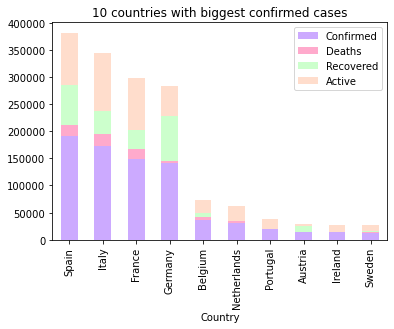

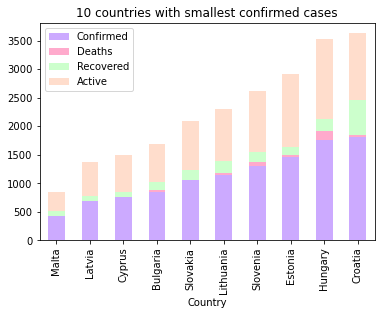

In [13]:
# Stack Bar Graf
# 10 najnakazenejsich
# Vypis celkoveho poctu, poctu ,umrti, nakazenych a vyliecenych
colors = ["#CCAAFF",
          "#FFAACC",
          "#CCFFCC",
          "#FFDDCC"]
europe.set_index('Country').nlargest(10, 'Confirmed').loc[:,['Confirmed','Deaths', 'Recovered','Active']].plot.bar(stacked=True, color=colors, title='10 countries with biggest confirmed cases')

# 10 krajin od najmensieho poctu pripadov
europe.set_index('Country').sort_values('Confirmed').head(10).loc[:,['Confirmed','Deaths', 'Recovered','Active']].plot.bar(stacked=True, color=colors, title='10 countries with smallest confirmed cases')
